## Stage 2:
## Generate weekly statistics for the number of cases and deaths in the state of Nevada

## Compare the data against other states (compare against 5 states). Normalize by population, use a normalization factor which is able to identify cases and deaths, for example try per 10,000 or 100,000 (this depends on the population). Plot the values across the weeks in a line plot for the 5 states in a single graph. Describe why the rates differ across these states in the notebook. Identify the peaks, do they compare with the US pattern?


The rates probably differ from external factors such as when the stae got it's first covid cases, population density, and overall how the citzens protected themselves from covid.

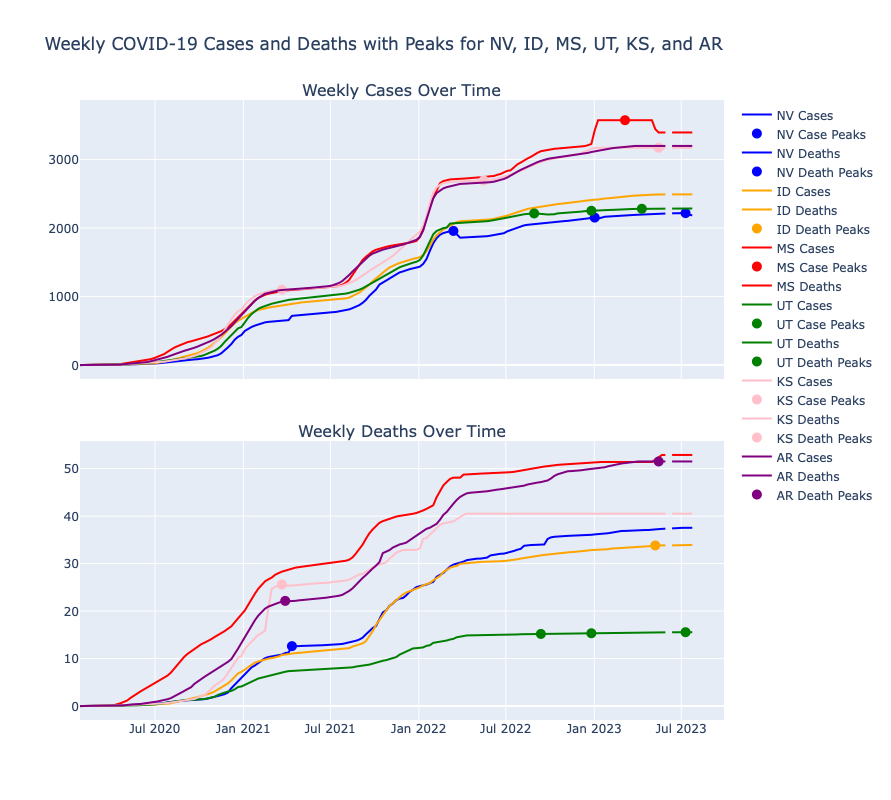

TypeError: write_image() missing 1 required positional argument: 'file'

In [29]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.signal import find_peaks
import plotly.io as pio
import plotly.express as px
import matplotlib.pyplot as plt
# Load the dataset

weekly_stats_df = pd.read_csv('Raven_weekly_covid_stats_per_10k.csv')

# Convert the 'date' column to datetime format
weekly_stats_df['date'] = pd.to_datetime(weekly_stats_df['date'])

# Define a dictionary for state colors
state_colors = {
    'NV': 'blue',
    'ID': 'orange',
    'MS': 'red',
    'UT': 'green',
    'KS': 'pink',
    'AR': 'purple'
}

# Initialize subplot
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    subplot_titles=("Weekly Cases Over Time", "Weekly Deaths Over Time"),
                    vertical_spacing=0.1)

states_to_plot = ['NV', 'ID', 'MS', 'UT', 'KS', 'AR']  # Specify the states to plot

# Loop through each state and plot cases and deaths with peaks
for state in states_to_plot:
    state_data = weekly_stats_df[weekly_stats_df['State'] == state]
    
    # Identify peaks for cases and deaths
    peaks_cases, _ = find_peaks(state_data['cases_mean_per_10k'], height=500)
    peaks_deaths, _ = find_peaks(state_data['deaths_mean_per_10k'], height=10)

    # Add traces for cases with designated color
    fig.add_trace(go.Scatter(x=state_data['date'], y=state_data['cases_mean_per_10k'], mode='lines',
                             name=f'{state} Cases', line=dict(color=state_colors[state])),
                  row=1, col=1)
    fig.add_trace(go.Scatter(x=state_data['date'].iloc[peaks_cases], y=state_data['cases_mean_per_10k'].iloc[peaks_cases],
                             mode='markers', marker=dict(color=state_colors[state], size=10), name=f'{state} Case Peaks'),
                  row=1, col=1)

    # Add traces for deaths with designated color
    fig.add_trace(go.Scatter(x=state_data['date'], y=state_data['deaths_mean_per_10k'], mode='lines',
                             name=f'{state} Deaths', line=dict(color=state_colors[state])),
                  row=2, col=1)
    fig.add_trace(go.Scatter(x=state_data['date'].iloc[peaks_deaths], y=state_data['deaths_mean_per_10k'].iloc[peaks_deaths],
                             mode='markers', marker=dict(color=state_colors[state], size=10), name=f'{state} Death Peaks'),
                  row=2, col=1)

# Update layout
fig.update_layout(height=800, width=1000, title_text="Weekly COVID-19 Cases and Deaths with Peaks for NV, ID, MS, UT, KS, and AR",
                  showlegend=True)

# Show the interactive plot
fig.show()

# Save static image for submission to GitHub
!pip install -U kaleido


pio.write_image( 'raven_weekly_covid_peaks_states.png')
fig.savefig('raven_weekly_covid_peaks_states.png')
print("Static image saved as 'raven_weekly_covid_peaks_states.png'.")

In [ ]:
#read file 
super_covid = pd.read_csv('super_covid_data.csv')
#filter for nevada
filtered_data = super_covid[super_covid['State'] == 'NV']
filtered_data.to_csv('nevada_pop.csv')

In [32]:
nevada_cases = t_filtered_data.iloc[0:352]
nevada_cases


NameError: name 't_filtered_data' is not defined

In [34]:
nevada_deaths = t_filtered_data.iloc[1269:1618]
nevada_deaths

NameError: name 't_filtered_data' is not defined

# Identify five counties within a state of your choice with high cases and death rates.

#### The top 5 counties with the highest amount of cases are Clark county, Washoe County, Elko county, Lyon county, and Douglas County.

####  The top 5 counties with the highest amount of deaths are clark county, washoe county, nye county, lyon county, and churchill county

In [52]:
# compare states
states_to_compare = ['NV', 'ID', 'MS', 'UT', 'KS', 'AR']

# filter 
comparison_df = super_covid[super_covid['State'].isin(states_to_compare)]

# Drop unnecessary columns
confirmed_columns = [col for col in comparison_df.columns if '_confirmed' in col]
deaths_columns = [col for col in comparison_df.columns if '_deaths' in col]

# Check for population
if 'population' in comparison_df.columns:
    population_column = 'population'
else:
    raise KeyError("Population column not found in the dataset")

# Combining the columns 
relevant_columns = ['State', 'County Name_x', population_column] + confirmed_columns + deaths_columns
comparison_df = comparison_df[relevant_columns]

# Replace zero 
comparison_df[population_column] = comparison_df[population_column].replace(0, np.nan)

# Reshape the data 
cases_df = comparison_df.melt(id_vars=['State', 'County Name_x', population_column], 
                              value_vars=confirmed_columns, 
                              var_name='date_type', 
                              value_name='cases')

deaths_df = comparison_df.melt(id_vars=['State', 'County Name_x', population_column], 
                               value_vars=deaths_columns, 
                               var_name='date_type', 
                               value_name='deaths')

# Separate date 
cases_df['date'] = cases_df['date_type'].str.extract(r'(\d{4}-\d{2}-\d{2})')
cases_df['type'] = 'confirmed'

deaths_df['date'] = deaths_df['date_type'].str.extract(r'(\d{4}-\d{2}-\d{2})')
deaths_df['type'] = 'deaths'

# Merge cases and deaths 
combined_df = pd.merge(cases_df[['State', 'County Name_x', 'date', 'cases', population_column]],
                       deaths_df[['State', 'County Name_x', 'date', 'deaths']],
                       on=['State', 'County Name_x', 'date'])

# Normalize the data per 10,000 population
combined_df['cases_per_100k'] = (combined_df['cases'] / combined_df[population_column]) * 10000
combined_df['deaths_per_100k'] = (combined_df['deaths'] / combined_df[population_column]) * 10000

# Convert date to datetime
combined_df['date'] = pd.to_datetime(combined_df['date'])

# Resample by week and calculate statistics for 10,000 
weekly_stats_per_100k = combined_df.groupby(['State']).resample('W-Mon', on='date').agg({
    'cases_per_100k': ['mean', 'median', lambda x: x.mode()[0] if not x.mode().empty else None],
    'deaths_per_100k': ['mean', 'median', lambda x: x.mode()[0] if not x.mode().empty else None]
}).reset_index()

# Rename columns 
weekly_stats_per_100k.columns = ['State', 'date', 'cases_mean_per_10k', 'cases_median_per_10k', 'cases_mode_per_10k', 'deaths_mean_per_10k', 'deaths_median_per_10k', 'deaths_mode_per_10k']

# Save the results to a CSV file
output_file_path = 'Raven_weekly_covid_stats_per_10k.csv'
weekly_stats_per_100k.to_csv(output_file_path, index=False)

print(f"Weekly COVID-19 statistics saved to {output_file_path}")

# Display it
for state in states_to_compare:
    print(f"Weekly COVID-19 Statistics for {state} (Mean, Median, Mode):")
    state_data = weekly_stats_per_100k[weekly_stats_per_100k['State'] == state]
    display(state_data.head) 

Weekly COVID-19 statistics saved to Raven_weekly_covid_stats_per_10k.csv
Weekly COVID-19 Statistics for NV (Mean, Median, Mode):


<bound method NDFrame.head of     State       date  cases_mean_per_10k  cases_median_per_10k  \
732    NV 2020-01-27            0.000000              0.000000   
733    NV 2020-02-03            0.000000              0.000000   
734    NV 2020-02-10            0.000000              0.000000   
735    NV 2020-02-17            0.000000              0.000000   
736    NV 2020-02-24            0.000000              0.000000   
..    ...        ...                 ...                   ...   
910    NV 2023-06-26         2216.709344           2157.885585   
911    NV 2023-07-03         2217.754334           2159.102765   
912    NV 2023-07-10         2218.536837           2160.319944   
913    NV 2023-07-17         2194.624522           2121.891845   
914    NV 2023-07-24         2185.445846           2122.239611   

     cases_mode_per_10k  deaths_mean_per_10k  deaths_median_per_10k  \
732            0.000000             0.000000               0.000000   
733            0.000000            

Weekly COVID-19 Statistics for ID (Mean, Median, Mode):


<bound method NDFrame.head of     State       date  cases_mean_per_10k  cases_median_per_10k  \
183    ID 2020-01-27            0.000000              0.000000   
184    ID 2020-02-03            0.000000              0.000000   
185    ID 2020-02-10            0.000000              0.000000   
186    ID 2020-02-17            0.000000              0.000000   
187    ID 2020-02-24            0.000000              0.000000   
..    ...        ...                 ...                   ...   
361    ID 2023-06-26         2491.795163           2399.131987   
362    ID 2023-07-03         2491.795163           2399.131987   
363    ID 2023-07-10         2491.795163           2399.131987   
364    ID 2023-07-17         2491.795163           2399.131987   
365    ID 2023-07-24         2491.795163           2399.131987   

     cases_mode_per_10k  deaths_mean_per_10k  deaths_median_per_10k  \
183            0.000000             0.000000               0.000000   
184            0.000000            

Weekly COVID-19 Statistics for MS (Mean, Median, Mode):


<bound method NDFrame.head of     State       date  cases_mean_per_10k  cases_median_per_10k  \
549    MS 2020-01-27            0.000000              0.000000   
550    MS 2020-02-03            0.000000              0.000000   
551    MS 2020-02-10            0.000000              0.000000   
552    MS 2020-02-17            0.000000              0.000000   
553    MS 2020-02-24            0.000000              0.000000   
..    ...        ...                 ...                   ...   
727    MS 2023-06-26         3395.792021           3332.292772   
728    MS 2023-07-03         3395.792021           3332.292772   
729    MS 2023-07-10         3395.792021           3332.292772   
730    MS 2023-07-17         3395.792021           3332.292772   
731    MS 2023-07-24         3395.792021           3332.292772   

     cases_mode_per_10k  deaths_mean_per_10k  deaths_median_per_10k  \
549             0.00000             0.000000               0.000000   
550             0.00000            

Weekly COVID-19 Statistics for UT (Mean, Median, Mode):


<bound method NDFrame.head of      State       date  cases_mean_per_10k  cases_median_per_10k  \
915     UT 2020-01-27            0.000000              0.000000   
916     UT 2020-02-03            0.000000              0.000000   
917     UT 2020-02-10            0.000000              0.000000   
918     UT 2020-02-17            0.000000              0.000000   
919     UT 2020-02-24            0.000000              0.000000   
...    ...        ...                 ...                   ...   
1093    UT 2023-06-26         2284.717735           2509.897724   
1094    UT 2023-07-03         2285.087683           2509.897724   
1095    UT 2023-07-10         2285.493223           2509.897724   
1096    UT 2023-07-17         2285.733695           2509.897724   
1097    UT 2023-07-24         2285.733695           2509.897724   

      cases_mode_per_10k  deaths_mean_per_10k  deaths_median_per_10k  \
915             0.000000             0.000000               0.000000   
916             0.000

Weekly COVID-19 Statistics for KS (Mean, Median, Mode):


<bound method NDFrame.head of     State       date  cases_mean_per_10k  cases_median_per_10k  \
366    KS 2020-01-27            0.000000              0.000000   
367    KS 2020-02-03            0.000000              0.000000   
368    KS 2020-02-10            0.000000              0.000000   
369    KS 2020-02-17            0.000000              0.000000   
370    KS 2020-02-24            0.000000              0.000000   
..    ...        ...                 ...                   ...   
544    KS 2023-06-26         3172.689278           3184.944593   
545    KS 2023-07-03         3172.689278           3184.944593   
546    KS 2023-07-10         3172.689278           3184.944593   
547    KS 2023-07-17         3172.689278           3184.944593   
548    KS 2023-07-24         3172.689278           3184.944593   

     cases_mode_per_10k  deaths_mean_per_10k  deaths_median_per_10k  \
366            0.000000             0.000000               0.000000   
367            0.000000            

Weekly COVID-19 Statistics for AR (Mean, Median, Mode):


<bound method NDFrame.head of     State       date  cases_mean_per_10k  cases_median_per_10k  \
0      AR 2020-01-27             0.00000              0.000000   
1      AR 2020-02-03             0.00000              0.000000   
2      AR 2020-02-10             0.00000              0.000000   
3      AR 2020-02-17             0.00000              0.000000   
4      AR 2020-02-24             0.00000              0.000000   
..    ...        ...                 ...                   ...   
178    AR 2023-06-26          3199.15656           3182.072544   
179    AR 2023-07-03          3199.15656           3182.072544   
180    AR 2023-07-10          3199.15656           3182.072544   
181    AR 2023-07-17          3199.15656           3182.072544   
182    AR 2023-07-24          3199.15656           3182.072544   

     cases_mode_per_10k  deaths_mean_per_10k  deaths_median_per_10k  \
0              0.000000             0.000000               0.000000   
1              0.000000            

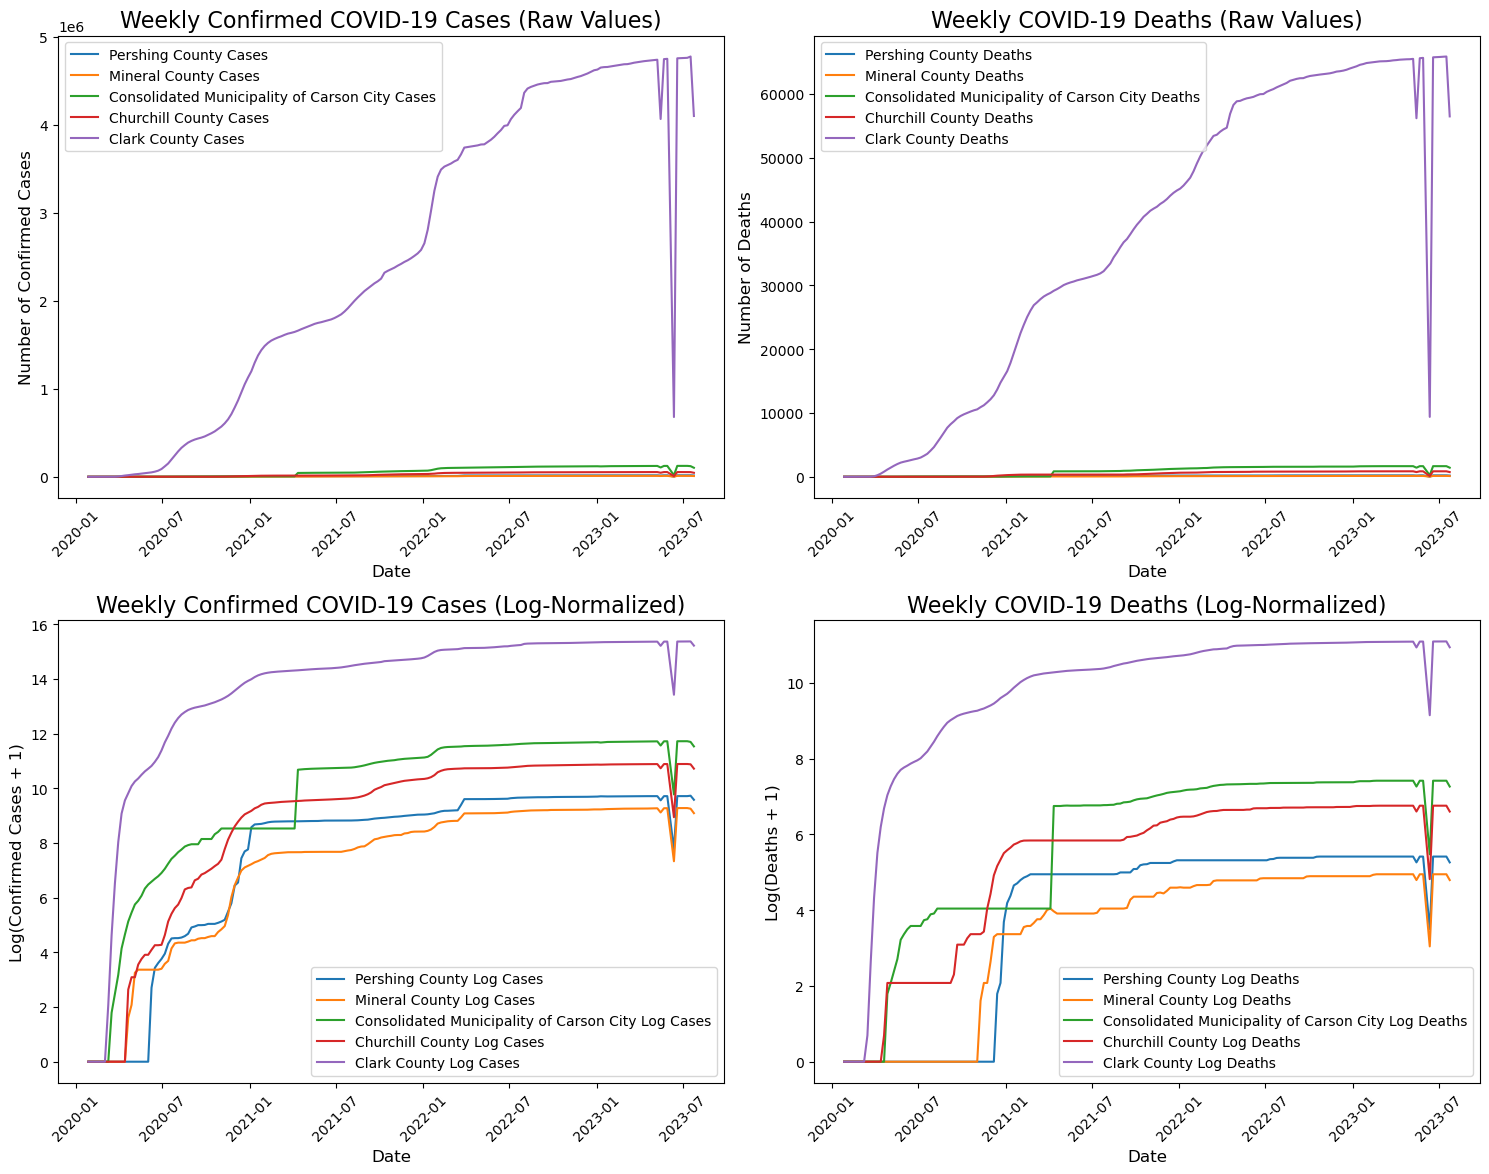

In [56]:





# Filter the data
nv_df = super_covid[(super_covid['State'] == 'NV') & (super_covid['County Name_x'] != 'Statewide Unallocated')].copy()

# Confirmed and death
confirmed_df = nv_df.loc[:, "2020-06-01_confirmed" : "2021-01-03_confirmed"]
deaths_df = nv_df.loc[:, "2020-06-01_deaths" : "2021-01-03_deaths"]

# get available confirmed cases and deaths columns
confirmed_columns = [col for col in nv_df.columns if '_confirmed' in col]
deaths_columns = [col for col in nv_df.columns if '_deaths' in col]

latest_confirmed_col = confirmed_columns[-1]  # Latest confirmed cases
latest_deaths_col = deaths_columns[-1]  # Latest deaths

# Calculate cases and deaths per 100,00 population
nv_df['cases_per_10k'] = (nv_df[latest_confirmed_col] / nv_df['population']) * 10000
nv_df['deaths_per_10k'] = (nv_df[latest_deaths_col] / nv_df['population']) * 10000

# Sort cases and deaths
top_nv_counties = nv_df.sort_values(by=['cases_per_10k', 'deaths_per_10k'], ascending=False).head(5)

# Reshape the dataframes 
confirmed_long = nv_df.melt(id_vars=['County Name_x'], 
                             value_vars=confirmed_columns,
                             var_name='Date', 
                             value_name='Confirmed')

deaths_long = nv_df.melt(id_vars=['County Name_x'], 
                          value_vars=deaths_columns,
                          var_name='Date', 
                          value_name='Deaths')

# Convert Date strings to datetime objects
confirmed_long['Date'] = confirmed_long['Date'].str.split('_').str[0]
deaths_long['Date'] = deaths_long['Date'].str.split('_').str[0]
confirmed_long['Date'] = pd.to_datetime(confirmed_long['Date'])
deaths_long['Date'] = pd.to_datetime(deaths_long['Date'])

# Group by County Name and Date, and sum the confirmed cases and deaths
weekly_confirmed = confirmed_long.groupby(['County Name_x', pd.Grouper(key='Date', freq='W-Mon')]).sum().reset_index()
weekly_deaths = deaths_long.groupby(['County Name_x', pd.Grouper(key='Date', freq='W-Mon')]).sum().reset_index()

# Calculate log-normalized values
weekly_confirmed['Log_Confirmed'] = np.log1p(weekly_confirmed['Confirmed'])  # log1p is log(1 + x)
weekly_deaths['Log_Deaths'] = np.log1p(weekly_deaths['Deaths'])

# subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot the raw confirmed cases
for county in top_nv_counties['County Name_x']:
    axes[0, 0].plot(weekly_confirmed[weekly_confirmed['County Name_x'] == county]['Date'], 
                    weekly_confirmed[weekly_confirmed['County Name_x'] == county]['Confirmed'], 
                    label=f"{county} Cases")

axes[0, 0].set_title('Weekly Confirmed COVID-19 Cases (Raw Values)', fontsize=16)
axes[0, 0].set_xlabel('Date', fontsize=12)
axes[0, 0].set_ylabel('Number of Confirmed Cases', fontsize=12)
axes[0, 0].legend()
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot the raw deaths
for county in top_nv_counties['County Name_x']:
    axes[0, 1].plot(weekly_deaths[weekly_deaths['County Name_x'] == county]['Date'], 
                    weekly_deaths[weekly_deaths['County Name_x'] == county]['Deaths'], 
                    label=f"{county} Deaths")

axes[0, 1].set_title('Weekly COVID-19 Deaths (Raw Values)', fontsize=16)
axes[0, 1].set_xlabel('Date', fontsize=12)
axes[0, 1].set_ylabel('Number of Deaths', fontsize=12)
axes[0, 1].legend()
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot the log-normalized cases
for county in top_nv_counties['County Name_x']:
    axes[1, 0].plot(weekly_confirmed[weekly_confirmed['County Name_x'] == county]['Date'], 
                    weekly_confirmed[weekly_confirmed['County Name_x'] == county]['Log_Confirmed'], 
                    label=f"{county} Log Cases")

axes[1, 0].set_title('Weekly Confirmed COVID-19 Cases (Log-Normalized)', fontsize=16)
axes[1, 0].set_xlabel('Date', fontsize=12)
axes[1, 0].set_ylabel('Log(Confirmed Cases + 1)', fontsize=12)
axes[1, 0].legend()
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot the log-normalized deaths
for county in top_nv_counties['County Name_x']:
    axes[1, 1].plot(weekly_deaths[weekly_deaths['County Name_x'] == county]['Date'], 
                    weekly_deaths[weekly_deaths['County Name_x'] == county]['Log_Deaths'], 
                    label=f"{county} Log Deaths")

axes[1, 1].set_title('Weekly COVID-19 Deaths (Log-Normalized)', fontsize=16)
axes[1, 1].set_xlabel('Date', fontsize=12)
axes[1, 1].set_ylabel('Log(Deaths + 1)', fontsize=12)
axes[1, 1].legend()
axes[1, 1].tick_params(axis='x', rotation=45)

# Display
plt.tight_layout()

fig.savefig('Raven_counties_nv_covid_weekly_plots.png')


plt.show()
